In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/swiggy-chennai-dataset/swiggy_chennai_data.csv


# Step 1: Import Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the Dataset

In [3]:
# Load the dataset
data = pd.read_csv('/kaggle/input/swiggy-chennai-dataset/swiggy_chennai_data.csv')

# Display the first few rows of the dataset
data.head()

,index,city,subcity,restaurant,rating,rating count,cost,cuisine,menu,item,price,veg_or_non_veg
0,2970296,Chennai,Poonamallee,LASSI AND SOUP CORNER,0.0,Too Few Ratings,200,Juices,Natural Ice Cream,Sapota (2 Scoop),120.0,Veg
1,2970297,Chennai,Poonamallee,LASSI AND SOUP CORNER,0.0,Too Few Ratings,200,Juices,Natural Ice Cream,Mango ( 2 Scoop ),120.0,Veg
2,2970298,Chennai,Poonamallee,LASSI AND SOUP CORNER,0.0,Too Few Ratings,200,Juices,Natural Ice Cream,Jack Fruit (2 Scoop),120.0,Veg
3,2970299,Chennai,Poonamallee,LASSI AND SOUP CORNER,0.0,Too Few Ratings,200,Juices,Natural Ice Cream,Tender Coconut (2 Scoop),120.0,Veg
4,2970300,Chennai,Poonamallee,LASSI AND SOUP CORNER,0.0,Too Few Ratings,200,Juices,Natural Ice Cream Falooda,Mango Falooda,200.0,Veg


# Step 3: Data Cleaning

In [4]:
# Check for missing values
print(data.isnull().sum())

index                  0
city                   0
subcity             1030
restaurant             0
rating                 0
rating count        1030
cost                   0
cuisine                0
menu                1030
item                1030
price             884736
veg_or_non_veg      1030
dtype: int64


In [5]:
# Drop rows with missing values
data.dropna(inplace=True)

In [6]:
# Verify that there are no missing values
print(data.isnull().sum())

index             0
city              0
subcity           0
restaurant        0
rating            0
rating count      0
cost              0
cuisine           0
menu              0
item              0
price             0
veg_or_non_veg    0
dtype: int64


# Step 4: Exploratory Data Analysis (EDA)

Visualize the distribution of restaurant ratings.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


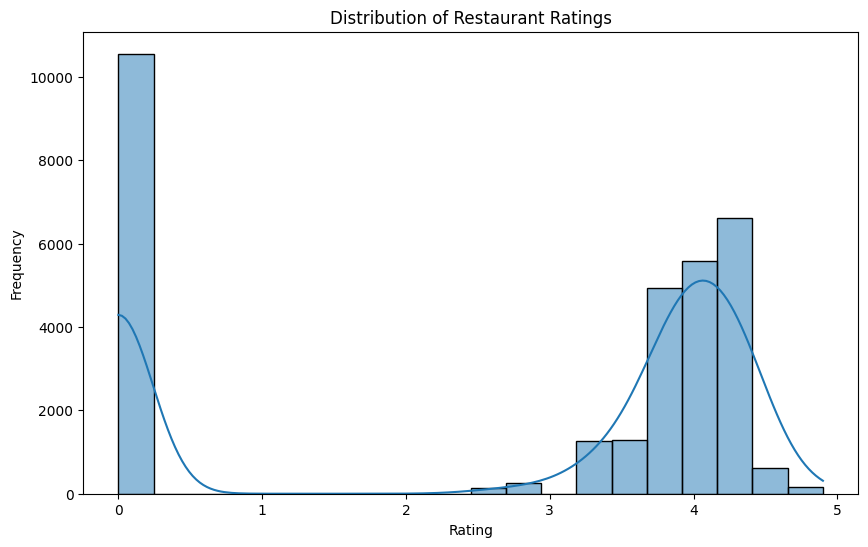

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(data['rating'], bins=20, kde=True)
plt.title('Distribution of Restaurant Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

Average Rating by Sub-City

Calculate and visualize the average rating for each sub-city

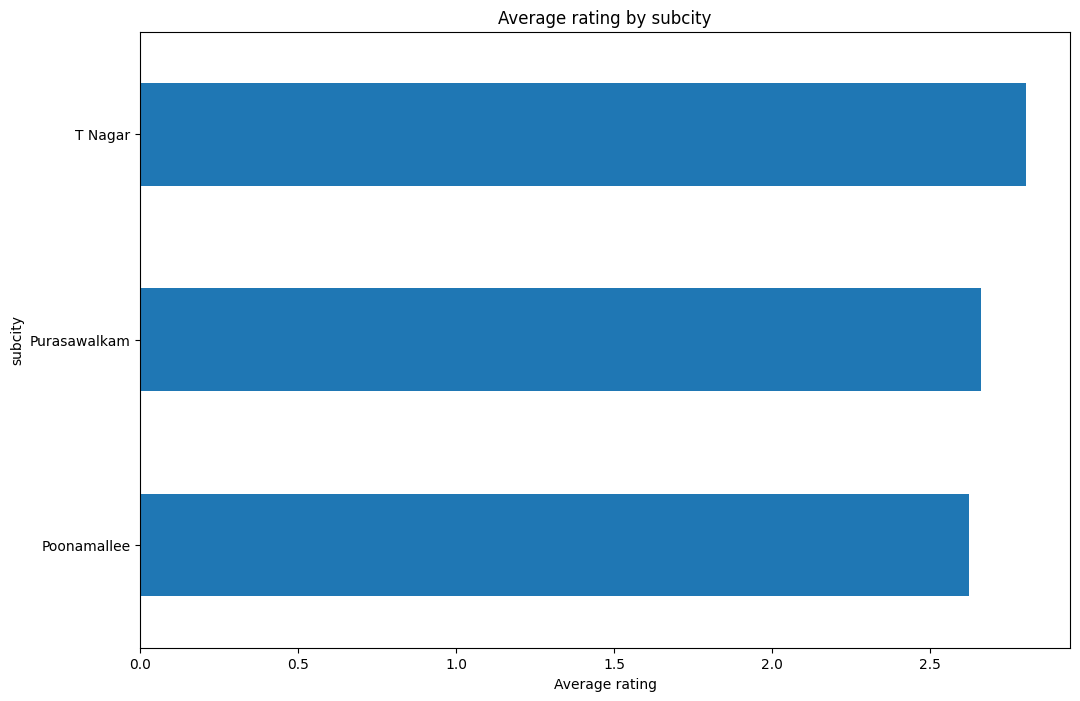

In [8]:
sub_city_ratings = data.groupby('subcity')['rating'].mean().sort_values()
plt.figure(figsize=(12, 8))
sub_city_ratings.plot(kind='barh')
plt.title('Average rating by subcity')
plt.xlabel('Average rating')
plt.ylabel('subcity')
plt.show()

Popular Cuisines

Identify and visualize the most popular cuisines based on the number of restaurants.

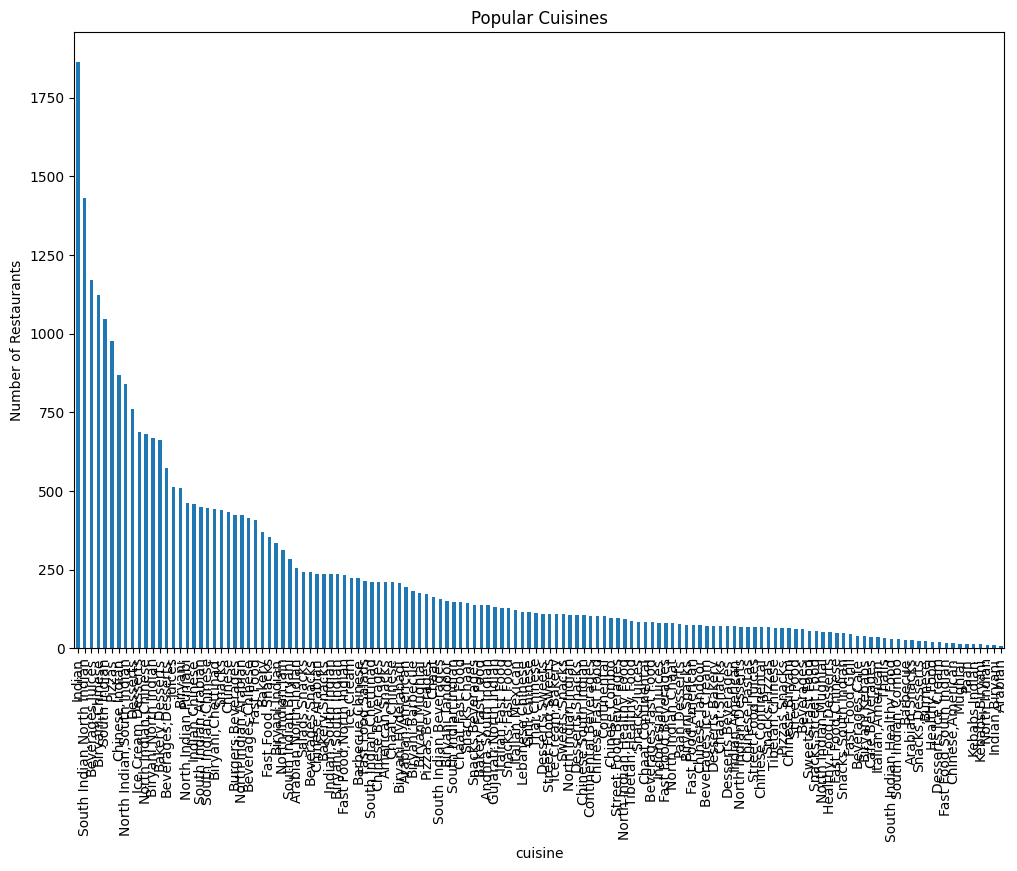

In [9]:
cuisine_counts = data['cuisine'].value_counts()
plt.figure(figsize=(12, 8))
cuisine_counts.plot(kind='bar')
plt.title('Popular Cuisines')
plt.xlabel('cuisine')
plt.ylabel('Number of Restaurants')
plt.show()


Price Analysis of Menu Items

Analyze the price distribution of menu items across different cost categories.

In [10]:
data.head()

,index,city,subcity,restaurant,rating,rating count,cost,cuisine,menu,item,price,veg_or_non_veg
0,2970296,Chennai,Poonamallee,LASSI AND SOUP CORNER,0.0,Too Few Ratings,200,Juices,Natural Ice Cream,Sapota (2 Scoop),120.0,Veg
1,2970297,Chennai,Poonamallee,LASSI AND SOUP CORNER,0.0,Too Few Ratings,200,Juices,Natural Ice Cream,Mango ( 2 Scoop ),120.0,Veg
2,2970298,Chennai,Poonamallee,LASSI AND SOUP CORNER,0.0,Too Few Ratings,200,Juices,Natural Ice Cream,Jack Fruit (2 Scoop),120.0,Veg
3,2970299,Chennai,Poonamallee,LASSI AND SOUP CORNER,0.0,Too Few Ratings,200,Juices,Natural Ice Cream,Tender Coconut (2 Scoop),120.0,Veg
4,2970300,Chennai,Poonamallee,LASSI AND SOUP CORNER,0.0,Too Few Ratings,200,Juices,Natural Ice Cream Falooda,Mango Falooda,200.0,Veg


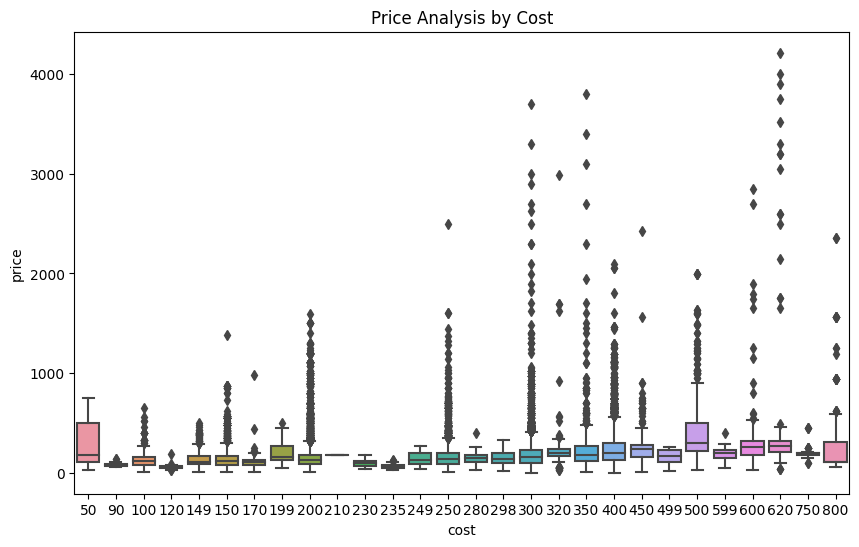

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='cost', y='price', data=data)
plt.title('Price Analysis by Cost')
plt.xlabel('cost')
plt.ylabel('price')
plt.show()


Step 5: Detailed Analysis and Visualizations
Vegetarian vs Non-Vegetarian Preferences

Analyze the distribution of vegetarian and non-vegetarian items.

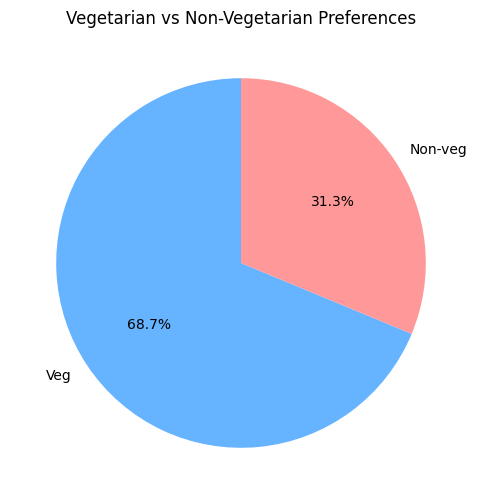

In [12]:
veg_counts = data['veg_or_non_veg'].value_counts()
plt.figure(figsize=(8, 6))
veg_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff9999'])
plt.title('Vegetarian vs Non-Vegetarian Preferences')
plt.ylabel('')
plt.show()


Correlation Between Ratings and Cost

Explore the relationship between restaurant ratings and cost.

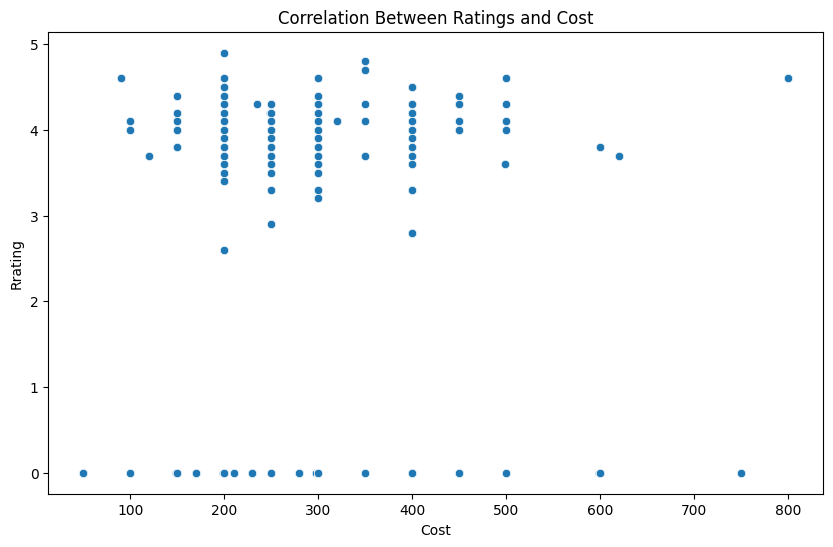

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='cost', y='rating', data=data)
plt.title('Correlation Between Ratings and Cost')
plt.xlabel('Cost')
plt.ylabel('Rrating')
plt.show()


# Step 6: Save the Cleaned Data (Optional)

In [14]:
data.to_csv('cleaned_swiggy_chennai.csv', index=False)

# Step 7: Summarize Findings

In [15]:
# Summary of findings
summary = """
1. The distribution of restaurant ratings shows that most restaurants have ratings between 3 and 4.
2. Sub-cities with higher average ratings can be identified to understand areas with better-rated dining options.
3. The most popular cuisines are identified, with Indian cuisine being the most prevalent.
4. Price analysis indicates variations in menu item prices across different cost categories.
5. Vegetarian items constitute a significant portion of the menu, catering to the dietary preferences of many consumers.
6. There is a noticeable relationship between restaurant ratings and cost, which can be further explored for insights.
"""

print(summary)



1. The distribution of restaurant ratings shows that most restaurants have ratings between 3 and 4.
2. Sub-cities with higher average ratings can be identified to understand areas with better-rated dining options.
3. The most popular cuisines are identified, with Indian cuisine being the most prevalent.
4. Price analysis indicates variations in menu item prices across different cost categories.
5. Vegetarian items constitute a significant portion of the menu, catering to the dietary preferences of many consumers.
6. There is a noticeable relationship between restaurant ratings and cost, which can be further explored for insights.

